# Inf-Sup 2x2 Example

We look at the inf-sup condition for a $2 \times 2$ matrix.
That is we are looking for a two form $a(u,w)$, we want to find out whether, 

$$
\inf_u  \sup_w \frac{a(u,w)}{|u||w|} > c > 0
$$

In [8]:
using Plots

In [59]:
R(θ) = [cos(θ) sin(θ); -sin(θ)  cos(θ)]
R(1)

2×2 Matrix{Float64}:
  0.540302  0.841471
 -0.841471  0.540302

In two dimensions this is equivalent to taking a matrix and move around two norm one vectors.

In [113]:
#A = [[6 4];[4 1]]  #A = [[6 4];[4 1]]
θ = 0

A = R(-θ)*[[1 0.1];[-0.1 0]]*R(θ)

2×2 Matrix{Float64}:
  1.0  0.1
 -0.1  0.0

In [114]:
N = 1000
par = (A,N)

([1.0 0.1; -0.1 0.0], 1000)

We define a function that evaluate de 2-form: 

In [115]:
function a(θ_1,θ_2,par)
    A, N = par
    return A[1,1].*cos.(θ_1)*cos(θ_2) .+ A[1,2].*cos.(θ_1).*sin(θ_2) .+ A[2,1].*sin.(θ_1)*cos(θ_2) .+ A[2,2].*sin.(θ_1)*sin(θ_2)
end

#function ap(θ_1,θ_2,par)
#    A, N = par
#    return @. A[1,1]*cos(θ_1)*cos(θ_2) + A[1,2]*cos.(θ_1)*sin(θ_2) + A[2,1]*sin(θ_1)*cos(θ_2) + A[2,2]*sin(θ_1)*sin(θ_2)
#end

#ap(0.1,0.2,par)

a (generic function with 1 method)

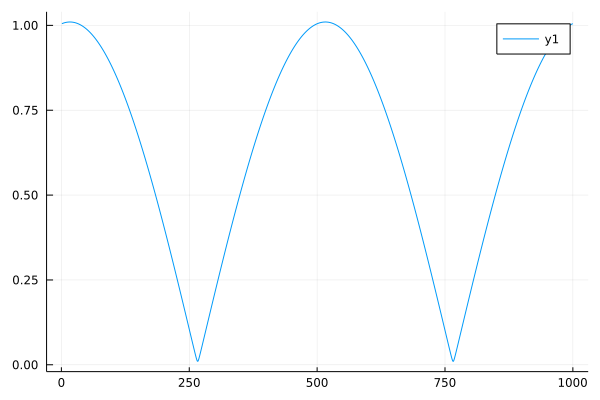

In [116]:
function sup_a(θ,par)
    dx = 2π/N
    θ_1 = collect(0:dx:2π)
    return maximum(a(θ_1,θ,par))
end

    

sup_am = zeros(N)
    for j in 1:N
        θ_2 = 2π*(j-1)/(N-1)
        sup_am[j] = sup_a(θ_2,par)
    end

dx = 2π/(N-1)
θ_2 = collect(0:dx:2π)
plot(sup_am)

In [117]:
function inf_sup(par)
    A, N = par
    sup_am = zeros(N)
    for j in 1:N
        θ_2 = 2π*(j-1)/(N-1)
        sup_am[j] = sup_a(θ_2,par)
    end
    return minimum(sup_am)
end

inf_sup(par)

0.009908671857396106

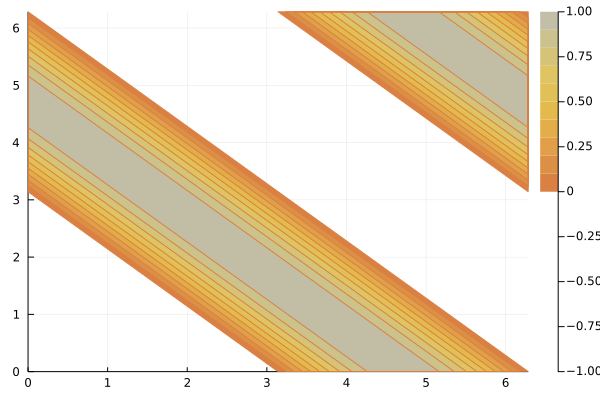

In [107]:
gr()
dx = 2π/N
x = 0:dx:2π #this is theta
y = 0:dx:2π # this is theta_dot

X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map((x,y)->a(x,y,par), X, Y)
#levels = 50
levels = -0.0:0.1:1.5
#levels = [0.,-0.01,-0.02]
#p1 = contour(x, v, Z, fill = true, levels = levels, contour_labels = true, c = cgrad(:beach))

#p2 = contour(x, y, Z, fill = true, levels = levels, c = cgrad([:orange, :blue]))
p2 = contour(x, y, Z, fill = true, levels = levels, c = cgrad(:beach))

plot(p2)
#plot(a(A,θ_1,θ_2))